# FINAL A6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

In [4]:
df['class'] = iris.target
df['class'] = df['class'].map(lambda x : iris.target_names[x%3])


# def getNames(x):
#     return iris.target_names[x%3]

# df['class'] = iris.target
# df['class'] = df['class'].map(getNames)

# df['Species'].replace(['Iris-virginica','Iris-versicolor','Iris-setosa'],[0,1,2],inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

In [9]:
df['class'].replace(iris.target_names,[0,1,2],inplace=True)

# categorical to numerical

In [10]:
X = df.drop(columns = ['class'])
Y = df['class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 5, stratify = Y)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)


GaussianNB()

In [15]:
Y_test_predicted = model.predict(X_test)
Y_train_predicted = model.predict(X_train)

In [16]:
# METRICS

model.score(X_test,Y_test)

0.9111111111111111

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,classification_report

<AxesSubplot:>

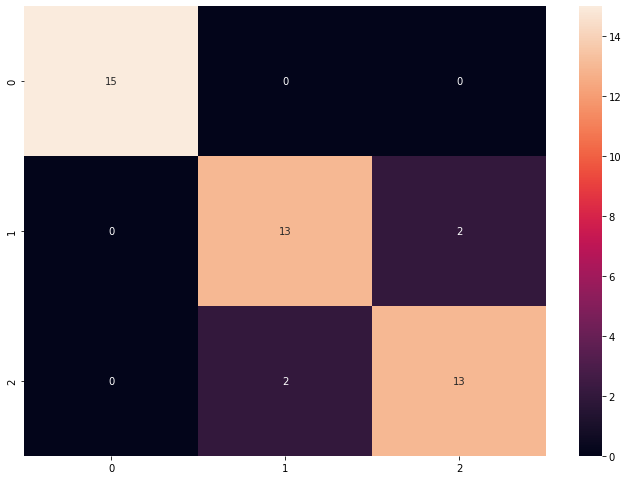

In [18]:
matrix = confusion_matrix(Y_test,Y_test_predicted)
matrix
sns.heatmap(matrix,annot=True)


In [19]:
print(classification_report(Y_test,Y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [20]:
accuracy = accuracy_score(Y_test,Y_test_predicted)
precision =precision_score(Y_test, Y_test_predicted,average='weighted')  #micro parameter is important or else it might not work
recall =  recall_score(Y_test, Y_test_predicted,average='weighted')
f1 = f1_score(Y_test,Y_test_predicted,average='weighted')

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 0.911
precision_Naive Bayes: 0.911
recall_Naive Bayes: 0.911
f1-score_Naive Bayes : 0.911
